In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Analyse Moyenne-Variance

### Cas n = 2

Dans un premier temps, exposons la th√©orie de Markowitz et de son analyse moyenne-variance dans le cas particulier o√π notre portefeuille contient 2 actifs, A et B.

Concentrons nous tout d'abord sur l'impact de la diversification du portefeuille. Pour rappel, la diversification du portefeuille, dans sa plus simple des formes, est repr√©sent√©e par les coefficients de corr√©lations lin√©aires entre les diff√©rents actifs qui le composent.

Un portefeuille diversifi√© doit √™tre construit de telle sorte que les actifs qui le composent soient faiblement voir n√©gativement corr√©l√©s entre eux ce qui tendrait √† stabiliser la volatilit√© globale du portefeuille. Les actifs n'√©voluent pas dans la m√™me direction ou du moins pas avec la m√™me intensit√©.

Dans la cellule suivante, je vais vous illustrer l'impact de ce coefficient en construisant dans le plan (sigma_p, mu_p) les graphes repr√©sentants l'ensemble des portefeuilles pour un certain coefficient de corr√©lation.

In [2]:
# Param√®tres
mu_a = 0.02  # Moyenne des rendements de l'actif A
mu_b = 0.05  # Moyenne des rendements de l'actif B
sigma_a = 0.10  # √âcart-type des rendements de l'actif A
sigma_b = 0.20  # √âcart-type des rendements de l'actif B
w_a = np.linspace(0, 1, 100) # Liste des poids appliqu√©s √† l'actif A
w_b = 1 - w_a # Liste des poids appliqu√©s √† l'actif B

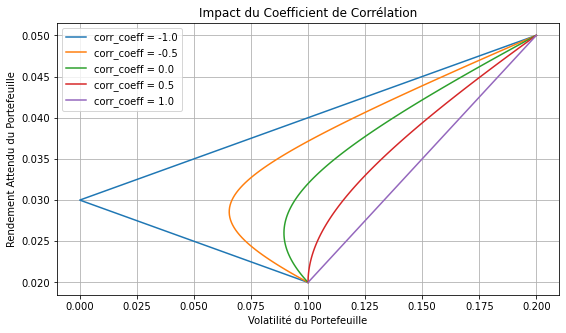

In [3]:
# Trac√© des figures
plt.figure(figsize=(9, 5))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt((w_a * sigma_a)**2 + (w_b * sigma_b)**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")

plt.xlabel('Volatilit√© du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corr√©lation')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions graphiques et th√©oriques

Ainsi, nous observons nettement que plus le coefficient de corr√©lation entre les deux actifs est bas plus le niveau de risque pour un m√™me rendement l'est aussi. 

Markowitz a ainsi d√©montr√© l'int√©r√™t fondamental de la diversification dans l'investissement en expliquant que si nous prenons deux portefeuilles diff√©rents par les actifs qui les composent et par leurs corr√©lations lin√©aires entre eux, mais similaires par les performances et les niveaux de risques individuels, alors le portefeuille pr√©sentant les actifs les moins corr√©l√©s entre eux saura moins risqu√© pour un m√™me niveau de rendement.

La diversification ne vise pas √† maximiser le rendement mais √† minimiser le risque pour un m√™me niveau de rendement.
Math√©matiquement, on dira que l'esperance de rendement n'est pas fonction du coeff de corr√©lation.

$$
\mu_P = w_A \cdot \mu_A + w_B \cdot \mu_B
$$


Analysons d√©sormais plus en profondeur les cas pour des valeurs particuli√®res du coefficient de corr√©lation.

- Cas corr_coef = 1

$$
\sigma^2_p = w_A^2 \cdot \sigma_A^2 + w_B^2 \cdot \sigma_B^2 + 2 \cdot w_A \cdot w_B \cdot \sigma_A \cdot \sigma_B
$$

Graphiquement pour ce cas, nous observons que les deux actifs sont r√©li√©s par un segment de droite. Cette progession lin√©aire s'explique par le fait que pour un coeff √©gal √† 1. La rentabilit√© esp√©r√©e et le risque du portefeuille sont des moyennes pond√©r√©es resp. de la rentabilit√© esp√©r√©es et du risque des deux titres.

Dans ce cas de figure, il est clair qu'il est impossible d'obtenir un niveau de risque inf√©rieur √† celui de l'actif le moins risqu√©. 

- Cas -1 < corr_coef < 1

Pour rappel, P est un portefeuille compos√© d'un actif A et d'un actif B.
Notons x et (1-x) leur poids respectif dans le portefeuille.

Determinons dans ces cas, le poids de variance minimale qui correspond √† la d√©riv√©e premi√®re de la variance du portefeuille par rapport.

$$
\sigma^2_p = x^2 \cdot \sigma^2_A + (1 - x)^2 \cdot \sigma^2_B + 2 \cdot x \cdot (1 - x) \cdot \rho \cdot \sigma_A \cdot \sigma_B
$$

$$
\frac{d}{dx} (\sigma^2_p) = x \cdot \sigma^2_A - (1 - x) \cdot \sigma^2_B + (1 - 2x) \cdot \rho \cdot \sigma_A \cdot \sigma_B = 0
$$

$$
x* = \frac{\sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B}{(\sigma^2_A + \sigma^2_B - \rho \cdot \sigma_A \cdot \sigma_B)}
$$

Ainsi, pour ce portefeuille nous avons la variance suivante:

$$
\sigma^2_p = \frac{\sigma^2_A \sigma^2_B (1 - \rho^2)}{\sigma^2_A + \sigma^2_B - 2 \rho \sigma_A \sigma_B}
$$

En supposant que l'actif A est l'actif avec la variance la plus faible et donc le moins risqu√©, calculons le delta de risque entre ces deux grandeurs.

$$
\delta = - \frac{\sigma^2_A (\sigma_A - \rho \sigma_B)^2}{\sigma^2_A + \sigma^2_B - 2 \rho {\sigma_A \sigma_B}} 
$$

Ainsi on comprend que si le coefficient n'est pas √©gal au rapport des √©carts type avec au num√©rateur l'√©cart type de l'actif A (le moins risqu√©), le rendement du portefeuille sera toujours inf√©rieur √† celui de l'actif le moins risqu√©.

Ce que l'on peut aussi en d√©duire vis √† vis de la valeur de x* est que si le coefficient de corr√©lation est sup√©rieur √† ce rapport alors la valeur du poids sera positive, sinon elle sera n√©gative et on sera dans le cadre d'une vente √† d√©couvert sur l'actif A et d'un achat √† effet de levier sur l'actif B.

En revanche, si le coefficient de corr√©lation est √©gal √† ce rapport alors le niveau de risque du portefeuille sera √©gal √† celui de l'actif le moins risqu√©. Seul cas o√π la diversification ne joue pas (Cf. courbe --> corr_coef = 0.5).

- Cas corr_coef = -1

Seul cas o√π le niveau de risque minimal est nul, pour une certain allocation.

<u>Conclusion</u>:

Si nous devons retenir une chose c'est que la diversification joue son r√¥le de minimiseur de risque √† partir du moment o√π le coefficient de corr√©lation est inf√©rieur √† 1 et diff√©rent du rapport des deux ecart types (moins risqu√© au num√©rateur).

Coefficient de corr√©lation: -1.0
Ponderation actif A 0.6667
Pond√©ration actif B 0.3333
Rendement du portefeuille 0.03
Volatilit√© du portefeuille 0.0


Coefficient de corr√©lation: -0.5
Ponderation actif A 0.7143
Pond√©ration actif B 0.2857
Rendement du portefeuille 0.0286
Volatilit√© du portefeuille 0.0655


Coefficient de corr√©lation: 0.0
Ponderation actif A 0.8
Pond√©ration actif B 0.2
Rendement du portefeuille 0.026
Volatilit√© du portefeuille 0.0894


Coefficient de corr√©lation: 0.5
Ponderation actif A 1.0
Pond√©ration actif B 0.0
Rendement du portefeuille 0.02
Volatilit√© du portefeuille 0.1


Coefficient de corr√©lation: 1.0
Ponderation actif A 2.0
Pond√©ration actif B -1.0
Rendement du portefeuille -0.01
Volatilit√© du portefeuille 0.0




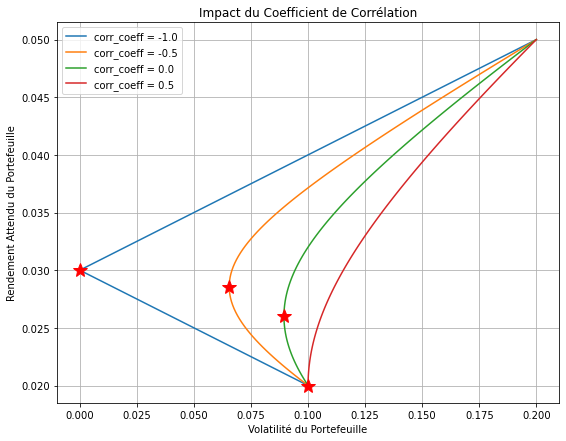

In [4]:
# Trac√©s des figures avec en plus le point de variance minimale
plt.figure(figsize=(9, 7))
for corr_coeff in np.linspace(-1, 1, 5):
    mu_p = w_a * mu_a + w_b * mu_b
    sigma_p = np.sqrt(w_a**2 * sigma_a**2 + w_b**2 * sigma_b**2 + 2 * w_a * w_b * corr_coeff * sigma_a * sigma_b)
    # Reporting
    x = (sigma_b**2 - corr_coeff * sigma_a * sigma_b) / (sigma_a**2 + sigma_b**2 - 2 * corr_coeff * sigma_a * sigma_b)
    mu_p_var_min = x * mu_a + (1-x) * mu_b
    sigma_p_min = np.sqrt(x**2 * sigma_a**2 + (1 - x)**2 * sigma_b**2 + 2 * x * (1 - x) * corr_coeff * sigma_a * sigma_b)
    print("Coefficient de corr√©lation:", corr_coeff)
    print("Ponderation actif A", round(x, 4))
    print("Pond√©ration actif B", round(1-x, 4))
    print("Rendement du portefeuille", round(mu_p_var_min, 4))
    print("Volatilit√© du portefeuille", round(sigma_p_min, 4))
    print("\n")
    # Trac√©s
    if corr_coeff == 1.0: # Cas vente √† d√©couvert
        continue
    plt.plot(sigma_p, mu_p, label=f"corr_coeff = {corr_coeff}")
    plt.plot(sigma_p_min, mu_p_var_min, color="red", marker="*", markersize=15)

    
plt.xlabel('Volatilit√© du Portefeuille')
plt.ylabel('Rendement Attendu du Portefeuille')
plt.title('Impact du Coefficient de Corr√©lation')
plt.legend()
plt.grid(True)
plt.show()

### Cas √† n actifs

Consid√©rons d√©sormais un portefeuille compos√© de n actifs risqu√©s avec n > 2.

w : vecteur R^n contenant les poids attribu√©s √† chaque actifs

$$
w = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_n
\end{bmatrix}
$$

R : vecteur R^n contenant les rentabilit√©s de chaque actifs

$$
\mu = \begin{bmatrix}
\mu_1 \\
\mu_2 \\
\vdots \\
\mu_n
\end{bmatrix}
$$

e : vecteur de R^n dont toutes les composantes sont √©gales √† 1

V : matrice de variances-covariances (n, n) des rentabilit√©s des actifs financiers. On supposera que notre portefeuille est diversifi√© et que chaque actif n'est pas lin√©airement d√©pendant aux autres, ainsi nous consid√©rerons que cette matrice est inversible. Cette hypoth√®se nous permettra de b√©n√©ficier de certaines propri√©t√©s simplificatrices.

La diversification garantit l'hypoth√©se d'une solution unique pour les probl√®mes d'optimisations √† suivre. 

$$
\Sigma = \begin{bmatrix}
\sigma_{1}^2 & \sigma_{1,2} & \cdots & \sigma_{1,n} \\
\sigma_{2,1} & \sigma_{2}^2 & \cdots & \sigma_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
\sigma_{n,1} & \sigma_{n,2} & \cdots & \sigma_{n}^2
\end{bmatrix}
$$

Rendement esp√©r√© du portefeuille

$$
E(R_p) = \mathbf{w}^T \cdot \boldsymbol{\mu} = \sum_{i=1}^{n} w_i \cdot \mu_i
$$

Variance attendue du portefeuille

$$
\sigma^2_p = \mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i \cdot w_j \cdot \sigma_{ij} = \sum_{i=1}^{n} w_i^2 \cdot \sigma_i^2 + 2 \cdot \sum_{i=1}^{n} \sum_{j=i+1}^{n} w_i \cdot w_j \cdot \sigma_{ij}
$$

Calculons d√©sormais la d√©riv√©e partielle de cette variance par rapport au poids du vecteur w du portefeuille:

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial}{\partial w_i} (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial (\mathbf{w}^T)} \cdot \frac{\partial (\mathbf{w}^T)}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \boldsymbol{\Sigma}} \cdot \frac{\partial \boldsymbol{\Sigma}}{\partial w_i} + \frac{\partial (\mathbf{w}^T \cdot \boldsymbol{\Sigma} \cdot \mathbf{w})}{\partial \mathbf{w}} \cdot \frac{\partial \mathbf{w}}{\partial w_i}
$$

$$
\frac{\partial \sigma_p^2}{\partial w_i} = 2 \cdot (\boldsymbol{\Sigma} \cdot \mathbf{w})_i = 2 \cdot \sum_{j=1}^{n} \sigma_{ij} \cdot w_j
$$


Cette derni√®re expression montre que la contribution marginale d'un titre au risque total du portefeuille se mesure par la covariance entre les rendements de l'actif et ceux du portefeuille. De m√™me, on peut d√©montrer cette m√™me propri√©t√© en appliquant une √©quipond√©ration des actifs du portefeuille √† 1/n (Hint: mettre en √©vidence deux moyennes).

Vous pourrez conclure qu'un portefeuille comprenant un grand nombre d'actifs voit sa variance tendre vers sa covariance moyenne. Ceci indique que dans le contexte d'un portefeuille bien diversifi√© seules les covariances impactent le portefeuille.

La determination de l'ensemble des portefeuilles minimisant la variance pour une esp√©rance de rentabilit√© fix√©e passe par la r√©solution du probl√®me d'optimisation quadratique :

- Rendement esp√©r√© fix√© : $w^T \mu = \bar{r}_p$ (contrainte de rendement)
- Somme des poids √©gale √† 1 : $w^T \mathbf{1} = 1$ (contrainte de budget)

La fonction objective √† minimiser est : $\sigma_p^2 = w^T \Sigma w$

Notez ici qu'il n'y aucune contrainte de non n√©gativit√© des poids ce qui signifie que les ventes √† d√©couvert sont autoris√©es.

Ainsi, par la m√©thode des lagrangiens, le probl√®me d'optimisation sous contrainte devient le probl√®me d'optimisation libre suivant:

$$
Min[\mathcal{L}(w, \lambda, \alpha) = w^T \Sigma w + \lambda (\bar{r}_p - w^T \mu) + \alpha (w^T \mathbf{1} - 1)]
$$

Ainsi, les conditions necessaires du premier ordre sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w - \lambda \mu + \alpha \mathbf{1} = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= \bar{r}_p - w^T \mu = 0 \\
\frac{\partial \mathcal{L}}{\partial \alpha} &= w^T \mathbf{1} - 1 = 0
\end{align*}
$$

Biens√ªr, aucun actif n'est consid√©r√© comme redondant c'est √† dire comme combinaison lin√©aire d'autres actifs march√©s.
La matrice de variance-covariance est inversible et cette matrice est d√©finie positive par nature de ses coefficients.

L'inversibilit√© de la matrice de variance-covariance (Œ£) signifie que cette matrice est non singuli√®re, c'est-√†-dire qu'elle ne poss√®de pas d'inversion. Cela est essentiel pour que le syst√®me d'√©quations de r√©solution du premier ordre puisse √™tre r√©solu de mani√®re unique pour obtenir les poids optimaux (w) ainsi que les multiplicateurs de Lagrange (Œª et Œ±) qui satisfont les conditions d'optimalit√©.

La d√©finie positivit√© de la matrice de variance-covariance (Œ£) garantit que la fonction objectif du probl√®me d'optimisation est strictement convexe. Cela signifie que la fonction forme une "cuve" vers le bas et ne poss√®de qu'un seul minimum global. En d'autres termes, il n'y a pas de cr√™tes ou de points de selle dans la fonction objectif qui pourraient induire des solutions non optimales.

Apr√®s r√©solution du syst√®me, nous obtenons comme valeurs pour les multiplicateurs:

$$
\lambda = 2 \cdot \frac{(C \cdot \bar{r}_p - A)}{d}
$$

$$
\delta = 2 \cdot \frac{(B - A \cdot \bar{r}_p)}{d}
$$

o√π

- $
A = e^T \cdot {\Sigma}^{-1} \cdot {\mu}
$

- $
B = {\mu}^T \cdot {\Sigma}^{-1}{\mu}
$

- $
C = e^T \cdot {\Sigma}^{-1} \cdot e
$

- $
d = BC - A^2
$

Ainsi, nous obtenons le vecteur d'allocation qui optimise notre portefeuille est √©gale √†:

$$
w = \frac{1}{d} \cdot (B \cdot \Sigma^{-1}\cdot e - A \cdot \Sigma^{-1}\cdot\mu) + \bar{r}_p \cdot \frac{1}{d} \cdot (C \cdot \Sigma^{-1} \cdot \mu - A \cdot \Sigma^{-1} \cdot e)
$$

Ainsi nous pouvons diff√©rencier deux composante w1 et w2 qui ne d√©pendent pas de l'objectif d'esp√©rance de rentabilit√©. Ces deux quantit√©s sont uniquement d√©pendant des esp√©rances de rendement individuels des titres, des leur variance et de leurs covariances.

Ainsi, on peut conclue que tout portefeuille de la fronti√®re de variance minimale peut s'√©crire comme la combinaison lin√©aire de deux portefeuilles sp√©ciaux de rendement $(1-\bar{r_p})$ et $\bar{r_p}$ dont les poids respectifs sont w1 et (w1 + w2).

Ainsi, on comprend que le premier portefeuille correspond au portefeuille optimal de rentabilit√© esp√©r√©e nulle et le deuxi√®me au portefeuille optimal de rentabilit√© esp√©r√©e 1.

Ainsi, au sens de Markowitz l'ensemble des portefeuille optimaux est une demi droite ind√©pendament du nombre d'actifs.

Rappel lorsque vous avez n actifs dans votre portefeuille avec une contrainte de budget (ce qui est toujours le cas dans la r√©alit√©) la dimension de l'espace associ√© aux allocations est de n-1. 

### (Application) Cas portefeuilles √† 5 actifs en utilisant la m√©thode d'optimisation ci-dessus

In [5]:
tickers = ["MSFT", "KO", "XOM", "AMZN", "BAC-PE", "META"]
start = "2022-01-01"
end = "2023-08-01"
data = yf.download(tickers, start=start, end=end)["Adj Close"]
data

[*********************100%***********************]  6 of 6 completed


AMZN     BAC-PE         KO        META  \
Date                                                                      
2022-01-03 00:00:00-05:00  170.404495  23.084217  56.725559  338.540009   
2022-01-04 00:00:00-05:00  167.522003  22.934616  57.672581  336.529999   
2022-01-05 00:00:00-05:00  164.356995  22.820967  58.150875  324.170013   
2022-01-06 00:00:00-05:00  163.253998  22.839121  57.844772  332.459991   
2022-01-07 00:00:00-05:00  162.554001  22.816517  57.710846  331.790009   
...                               ...        ...        ...         ...   
2023-07-25 00:00:00-04:00  129.130005  20.527439  62.250000  294.470001   
2023-07-26 00:00:00-04:00  128.149994  20.753448  63.049999  298.570007   
2023-07-27 00:00:00-04:00  128.250000  20.512701  62.439999  311.709991   
2023-07-28 00:00:00-04:00  132.210007  20.580000  62.480000  325.480011   
2023-07-31 00:00:00-04:00  133.679993  21.000000  61.930000  318.600006   

                                 MSFT         XOM  
Date                                               
2022-01-03 00:00:00-05:00  330.092285   60.127102  
2022-01-04 00:00:00-05:00  324.432129   62.388733  
2022-01-05 00:00:00-05:00  311.977875   63.164696  
2022-01-06 00:00:00-05:00  309.512665   64.650360  
2022-01-07 00:00:00-05:00  309.670471   65.180283  
...                               ...         ...  
2023-07-25 00:00:00-04:00  350.980011  105.680000  
2023-07-26 00:00:00-04:00  337.769989  105.089996  
2023-07-27 00:00:00-04:00  330.720001  105.419998  
2023-07-28 00:00:00-04:00  338.369995  104.160004  
2023-07-31 00:00:00-04:00  335.920013  107.239998  

[395 rows x 6 columns]

In [6]:
#Returns
returns = data.pct_change().dropna()
returns

AMZN    BAC-PE        KO      META      MSFT  \
Date                                                                          
2022-01-04 00:00:00-05:00 -0.016916 -0.006481  0.016695 -0.005937 -0.017147   
2022-01-05 00:00:00-05:00 -0.018893 -0.004955  0.008293 -0.036728 -0.038388   
2022-01-06 00:00:00-05:00 -0.006711  0.000796 -0.005264  0.025573 -0.007902   
2022-01-07 00:00:00-05:00 -0.004288 -0.000990 -0.002315 -0.002015  0.000510   
2022-01-10 00:00:00-05:00 -0.006570  0.002184  0.001657 -0.011212  0.000732   
...                             ...       ...       ...       ...       ...   
2023-07-25 00:00:00-04:00  0.002562  0.006505 -0.003362  0.009808  0.017009   
2023-07-26 00:00:00-04:00 -0.007589  0.011010  0.012851  0.013923 -0.037638   
2023-07-27 00:00:00-04:00  0.000780 -0.011600 -0.009675  0.044010 -0.020872   
2023-07-28 00:00:00-04:00  0.030877  0.003281  0.000641  0.044176  0.023131   
2023-07-31 00:00:00-04:00  0.011119  0.020408 -0.008803 -0.021138 -0.007241   

                                XOM  
Date                                 
2022-01-04 00:00:00-05:00  0.037614  
2022-01-05 00:00:00-05:00  0.012438  
2022-01-06 00:00:00-05:00  0.023520  
2022-01-07 00:00:00-05:00  0.008197  
2022-01-10 00:00:00-05:00 -0.005952  
...                             ...  
2023-07-25 00:00:00-04:00  0.001516  
2023-07-26 00:00:00-04:00 -0.005583  
2023-07-27 00:00:00-04:00  0.003140  
2023-07-28 00:00:00-04:00 -0.011952  
2023-07-31 00:00:00-04:00  0.029570  

[394 rows x 6 columns]

In [7]:
# Variance Matrix
var_returns = returns.cov()
var_returns

AMZN    BAC-PE        KO      META      MSFT       XOM
AMZN    0.000809  0.000091  0.000093  0.000639  0.000421  0.000098
BAC-PE  0.000091  0.000112  0.000028  0.000102  0.000070  0.000030
KO      0.000093  0.000028  0.000121  0.000065  0.000086  0.000039
META    0.000639  0.000102  0.000065  0.001384  0.000462  0.000062
MSFT    0.000421  0.000070  0.000086  0.000462  0.000435  0.000061
XOM     0.000098  0.000030  0.000039  0.000062  0.000061  0.000414

--- MVP --- 
MVP Return:  [[0.00020656]]
MVP Std:  0.008237543671720686
MVP Allocation:  [[-4.47775418 49.43896184 43.42552122  0.23117414  1.89428798  9.487809  ]]


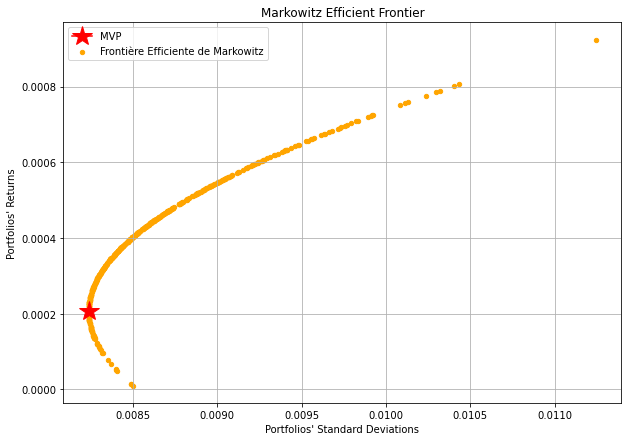

In [8]:
def weights_list(n):
    k = np.random.rand(n)
    return k / np.sum(k)

def analyse_moyenne_variance_risked_pf(returns, var_returns, nb_of_assets, number_of_simulations):
    portfolio_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Random portfolios
        w = np.asmatrix(weights_list(n))
        portfolio_return = w * returns_m.T
        portfolio_returns.append(portfolio_return)

        #Optimisation
        e = np.asmatrix(np.ones(nb_of_assets))
        inv_vars_m = np.linalg.inv(vars_m)
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T
        d = B*C - np.power(A, 2)
        f1 = inv_vars_m * returns_m.T
        f2 = inv_vars_m * e.T

        w_optimized = (1/d) * ((C * portfolio_return - A) * f1.T + (B - A * portfolio_return) * f2.T)
        portfolio_optimized_allocations.append(w_optimized)

        portfolio_optimized_stds.append(np.sqrt(w_optimized * vars_m * w_optimized.T))

    return portfolio_returns, portfolio_optimized_stds, portfolio_optimized_allocations

# ------------------ Parameters ------------------ 
n = len(tickers)
number_of_simulations = 500

# ------------------ Portefeuille de variance minimale ------------------
portfolio_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_risked_pf(returns, var_returns, n, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return =  portfolio_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ", 100*mvp_allocation)


# ------------------ Fonti√®re efficiente ------------------
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_optimized_stds, portfolio_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

Nous avons trouver ci-dessus le point associ√© au portefeuille de variance minimale par une m√©thode num√©rique "np.min" qui utilise l'algorithme de tri 'quicksort' tr√®s efficace et d'ailleurs la plus efficace de tous les algo de tri avec une complexit√© $O(n*log(n))$.

Cependant nous pouvons tr√®s facilement trouver une solution ferm√©e √† ce probl√®me, puisque ce portefeuille se situe au point o√π la tangente est verticale par rapport √† la fronti√®re. Ce qui revient √† r√©soudre :

$$
\frac{\partial \sigma_p^2}{\partial \bar{r_p}} = 0
$$

$$
\begin{align*}
==> \bar{r_p} = \frac{A}{C} \\
==> \sigma_p^2 = \frac{1}{C}
\end{align*}
$$

Pour rappel les valeur de A et C ont √©t√© d√©termin√©es dans la r√©solution du probl√®me d'optimisation plus haut et valent toujours respectivement:

- $
e^T \cdot {\Sigma}^{-1} \cdot \mu
$
- $
e^T \cdot {\Sigma}^{-1} \cdot e
$

### Quelques conclusions graphiques quant √† l'application

L'ensemble des portefeuilles qu'il est possible de construire √† partir des n actifs est contenus dans l'air contenue √† l'int√©rieur de l'hyberbole.

Les portefeuilles dont l'esperance de rentabilit√© se trouve en dessous de A/C sont domin√©s c'est √† dire qu'il existe pour chacun des portefeuilles de cette portion de la courbe un autre portefeuille dont l'esp√©rance de rentabilit√© est plus √©lev√© pour une exposition au risque √©quivalente. Il s'agit du point symp√©triquement oppos√© et qui appartient √† la portion de la courbe que l'on appelle fronti√®re efficiente.

Ainsi, nous comprenons que dans le cadre de l'analyse moyenne-variance il nous faudra nous concentrer sur les portefeuilles contenue dans l'air au dessus de la droite horizontale d'√©quation: $\bar{r_p} = \frac{A}{C}$

Pour Markowitz (dans le cadre de son analyse moyenne-variance int√©gralement compos√© d'actifs risqu√©), un investisseur rationnel devra choisir le portefeuille minimisant la variance pour une esp√©rance de rentabilit√© sup√©rieur √† celle du portefeuille de variance minimale.

Plus tard, il sera int√©ressant de d√©terminer quelles conditions permettent de determiner les portefeuilles efficients dont les poids sont strictement positifs, i.e. les portefeuilles qui n'ont pas recours √† de la vente √† d√©couvert. Certains fonds sous la r√©gulation UCITS n'ont pas le droit d'avoir recours √† ce genre de gestion qui exposerait √† un risque plus √©lev√© les √©pargnants.

### Cas √† n actifs risqu√©s et un actif sans risque

Nous prendrons conventionnelement comme actif sans risque une obligation d'Etat √† taux fixe moyen terme (10 ans) de tr√®s bonne notation.

Pr√©c√©dement, nous avons men√© une analyse moyenne variance dans le cas o√π le march√© ne comportait aucun actif sans risque ce qui ne constitue pas toujours une bonne approximation et une approche rationnelle. Cependant la conjoncture de ces 5 derni√®res ann√©es (entre 2015-2022) avec la baisse des taux d'int√©r√™ts (jusqu'√† atteindre des niveaux n√©gatifs) ont √©t√© une conjoncture qui pouvait justifier la rationnalit√© de cette approche.

Pla√ßons nous d√©sormais dans un contexte de niveaux d'int√©r√™ts √©lev√©s un peu comme on est entrain de connaitre actuellement depuis un an. 

Notons $w_0$ la portion de la richesse investie dans l'actif sans risque, soit:
$$
w^T \cdot e + w_0 = 1 
$$

Ainsi, l'√©nonc√© de notre probl√®me d'optimisation sous contrainte a chang√© pour devenir:

$$
Min_w w^T \Sigma w
$$

$$ s.t. : w^T\cdot\mu + (1 -  w^T \cdot e) R_f = \bar{r_p} $$

Ainsi, via la m√©thode du Lagrangien nous transformons ce probl√®me d'optiomisation sous contrainte en un probl√®me d'optimisation libre dont la fonction objectif est: 

$$
Min_w(L(w, \lambda) = w^T \Sigma w + \lambda \cdot (w^T \cdot \mu + (1 -  w^T \cdot e) R_f))
$$

Les conditions du premier ordre n√©cessaires et suffisantes pour un minimum global sont:

$$
\begin{align*}
\frac{\partial \mathcal{L}}{\partial w} &= 2 \Sigma w + \lambda (\mu - e R_f) = 0 \\
\frac{\partial \mathcal{L}}{\partial \lambda} &= w^T \mu + (1 - w^T e) R_f = 0 \\
\end{align*}
$$

Apr√®s r√©solution, on obtient comme valeur de w:

$$
w = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{(\mu - e R_f)^T \Sigma^{-1} (\mu - e R_f)}
  = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{B - 2AR_f + C R_f^2}
$$

Ainsi, la variance d'un portefeuille de la fronti√®re efficiente s'√©crit:

$$
\sigma_p^2(\bar{r_p}) = \frac{(\bar{r_p} - R_f)^2}{B - 2AR_f + C R_f^2}
$$

On a donc pour un portefeuille de la fronti√®re efficient un √©cart type d√©fini par morceaux tel que:

$$
\frac{(\bar{r_p} - R_f)}{\sqrt(B - 2AR_f + C R_f^2)}, si \bar(r_p) \geq R_f \\
\frac{- (\bar{r_p} - R_f)}{\sqrt(B - 2AR_f + C R_f^2)}, si \bar(r_p) \leq R_f 
$$

<u> Conclusion </u>

Ainsi, en pr√©sence d'un actif sans risque, la fronti√®re efficiente est la r√©union de demi-droite se rejoignant au point de coordonn√©s (0, Rf) (Pour rappel la fronti√®re efficiente se trace dans le plan $(\sigma_p, \bar{r_p})$

### (Application) Cas d'un portefeuille √† n actifs risqu√© et un actif sans risque

In [9]:
data

AMZN     BAC-PE         KO        META  \
Date                                                                      
2022-01-03 00:00:00-05:00  170.404495  23.084217  56.725559  338.540009   
2022-01-04 00:00:00-05:00  167.522003  22.934616  57.672581  336.529999   
2022-01-05 00:00:00-05:00  164.356995  22.820967  58.150875  324.170013   
2022-01-06 00:00:00-05:00  163.253998  22.839121  57.844772  332.459991   
2022-01-07 00:00:00-05:00  162.554001  22.816517  57.710846  331.790009   
...                               ...        ...        ...         ...   
2023-07-25 00:00:00-04:00  129.130005  20.527439  62.250000  294.470001   
2023-07-26 00:00:00-04:00  128.149994  20.753448  63.049999  298.570007   
2023-07-27 00:00:00-04:00  128.250000  20.512701  62.439999  311.709991   
2023-07-28 00:00:00-04:00  132.210007  20.580000  62.480000  325.480011   
2023-07-31 00:00:00-04:00  133.679993  21.000000  61.930000  318.600006   

                                 MSFT         XOM  
Date                                               
2022-01-03 00:00:00-05:00  330.092285   60.127102  
2022-01-04 00:00:00-05:00  324.432129   62.388733  
2022-01-05 00:00:00-05:00  311.977875   63.164696  
2022-01-06 00:00:00-05:00  309.512665   64.650360  
2022-01-07 00:00:00-05:00  309.670471   65.180283  
...                               ...         ...  
2023-07-25 00:00:00-04:00  350.980011  105.680000  
2023-07-26 00:00:00-04:00  337.769989  105.089996  
2023-07-27 00:00:00-04:00  330.720001  105.419998  
2023-07-28 00:00:00-04:00  338.369995  104.160004  
2023-07-31 00:00:00-04:00  335.920013  107.239998  

[395 rows x 6 columns]

In [10]:
returns

AMZN    BAC-PE        KO      META      MSFT  \
Date                                                                          
2022-01-04 00:00:00-05:00 -0.016916 -0.006481  0.016695 -0.005937 -0.017147   
2022-01-05 00:00:00-05:00 -0.018893 -0.004955  0.008293 -0.036728 -0.038388   
2022-01-06 00:00:00-05:00 -0.006711  0.000796 -0.005264  0.025573 -0.007902   
2022-01-07 00:00:00-05:00 -0.004288 -0.000990 -0.002315 -0.002015  0.000510   
2022-01-10 00:00:00-05:00 -0.006570  0.002184  0.001657 -0.011212  0.000732   
...                             ...       ...       ...       ...       ...   
2023-07-25 00:00:00-04:00  0.002562  0.006505 -0.003362  0.009808  0.017009   
2023-07-26 00:00:00-04:00 -0.007589  0.011010  0.012851  0.013923 -0.037638   
2023-07-27 00:00:00-04:00  0.000780 -0.011600 -0.009675  0.044010 -0.020872   
2023-07-28 00:00:00-04:00  0.030877  0.003281  0.000641  0.044176  0.023131   
2023-07-31 00:00:00-04:00  0.011119  0.020408 -0.008803 -0.021138 -0.007241   

                                XOM  
Date                                 
2022-01-04 00:00:00-05:00  0.037614  
2022-01-05 00:00:00-05:00  0.012438  
2022-01-06 00:00:00-05:00  0.023520  
2022-01-07 00:00:00-05:00  0.008197  
2022-01-10 00:00:00-05:00 -0.005952  
...                             ...  
2023-07-25 00:00:00-04:00  0.001516  
2023-07-26 00:00:00-04:00 -0.005583  
2023-07-27 00:00:00-04:00  0.003140  
2023-07-28 00:00:00-04:00 -0.011952  
2023-07-31 00:00:00-04:00  0.029570  

[394 rows x 6 columns]

In [11]:
var_returns

AMZN    BAC-PE        KO      META      MSFT       XOM
AMZN    0.000809  0.000091  0.000093  0.000639  0.000421  0.000098
BAC-PE  0.000091  0.000112  0.000028  0.000102  0.000070  0.000030
KO      0.000093  0.000028  0.000121  0.000065  0.000086  0.000039
META    0.000639  0.000102  0.000065  0.001384  0.000462  0.000062
MSFT    0.000421  0.000070  0.000086  0.000462  0.000435  0.000061
XOM     0.000098  0.000030  0.000039  0.000062  0.000061  0.000414

Taux sans risque √©quivalent:  4%
Taux sans risque √©quivalent:  0.04
Tickers:  ['MSFT', 'KO', 'XOM', 'AMZN', 'BAC-PE', 'META']

--- MVP --- 
MVP Return:  [[0.00015386]]
MVP Std:  4.3282340494434967e-07
MVP Allocation: 
Risked Assets: [[-0.0008104785158177772], [-0.001989595802510277], [0.00044799317899335344], [0.00040145092674568873], [0.0004438279145431398], [0.0018607068103278328]]
Unrisked Asset: [[99.9996461]]


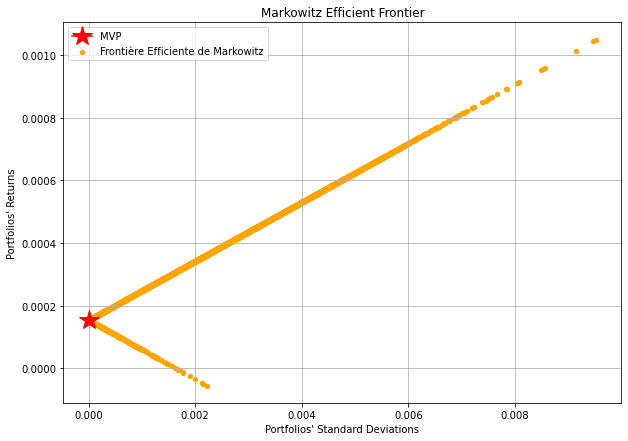

In [12]:
def analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, nb_of_assets, number_of_simulations):
    r_f = np.power((1 + r_f), 1/255) - 1
    portfolio_returns, portfolio_optimized_stds, portfolio_optimized_allocations = [], [], []
    for _ in range(number_of_simulations):
        returns_m = np.asmatrix(returns.mean())
        vars_m = np.asmatrix(var_returns)

        # Rendements des portefeuilles
        w = np.asmatrix(weights_list(n))
        portfolio_return = w * returns_m.T
        portfolio_returns.append(portfolio_return)

        #Optimisation
        inv_vars_m = np.linalg.inv(vars_m)
        e = np.asmatrix(np.ones(nb_of_assets))
        A = e * inv_vars_m * returns_m.T
        B = returns_m * inv_vars_m * returns_m.T
        C = e * inv_vars_m * e.T

        w_optimized = inv_vars_m.T * (returns_m - e * r_f).T * (portfolio_return - r_f) / (B - 2 * A * r_f + C * r_f**2)
        portfolio_optimized_allocations.append(w_optimized)

        if portfolio_return >= r_f:
            std_optimized = (portfolio_return - r_f)/np.sqrt(B - 2 * A * r_f + C * r_f**2)
            portfolio_optimized_stds.append(std_optimized)
        else:
            std_optimized = - (portfolio_return - r_f)/np.sqrt(B - 2 * A * r_f + C * r_f**2)
            portfolio_optimized_stds.append(std_optimized)
    
    return portfolio_returns, portfolio_optimized_stds, portfolio_optimized_allocations

    # ------------------ Param√®tre ------------------
number_of_simulations = 5000
r_f = 0.04
print("Taux sans risque √©quivalent: ", "4%")
print("Taux sans risque √©quivalent: ", r_f) #Journalier
print("Tickers: ", tickers)

# ------------------ Portefeuille de variance minimale ------------------
portfolio_returns, portfolio_optimized_stds, portfolio_optimized_allocations = analyse_moyenne_variance_less_risky_pf(returns, var_returns, r_f, n, number_of_simulations)
mvp_std = np.min(portfolio_optimized_stds)
index_mvp_std = portfolio_optimized_stds.index(mvp_std)
mvp_return  = portfolio_returns[index_mvp_std]
mvp_allocation = portfolio_optimized_allocations[index_mvp_std]

print("\n--- MVP --- ")
print("MVP Return: ", mvp_return)
print("MVP Std: ", mvp_std)
print("MVP Allocation: ")
print("Risked Assets:", (100*mvp_allocation).tolist())
print("Unrisked Asset:", 100*(1 - sum(mvp_allocation)))

# ------------------ Fonti√®re efficiente ------------------
plt.figure(figsize=(10, 7))
plt.scatter(portfolio_optimized_stds, portfolio_returns, color="orange", marker="o", s=19, label="Fronti√®re Efficiente de Markowitz")
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)
plt.title("Markowitz Efficient Frontier")
plt.xlabel("Portfolios' Standard Deviations")
plt.ylabel("Portfolios' Returns")
plt.grid()
plt.legend()

#### Conclusion graphique

Nous observons ci-dessus la fronti√®re efficiente d'un portefeuille contenant 6 actifs risqu√©s (actions) et un actif sans risque (obligation d'√©tat am√©ricain).

A l'instar de l'analyse moyenne-variance sur un portefeuille exclusivement risqu√©, la repartition des portefeuilles met en √©vidence encore une fois qu'il existe plusieurs portefeuilles expos√©s √† un m√™me niveau de risque sur la base des m√™mes actifs. Ainsi, nous comprendrons que la branche d√©croissante repr√©sente l'ensemble des portefeuilles qui maximise le risque et la branche croissante (fronti√®re efficiente) ceux qui le minimise pour un m√™me niveau de risque.

Le marker √©toile rouge repr√©sente le portefeuille de variance minimale qui sera, dans ce cas de figure d'apr√®s √©tude analytique, toujours de coordonn√©es (0, Rf) qui repr√©sente le portefeuille o√π l'on alloue pratiquement l'int√©gralit√© du poids √† l'actif sans risque.

### Comparaison avec le portefeuille risk only

Comparons d√©sormais les r√©sultats d'un tel portefeuille avec celui d'un portefeuille risqu√©. Dans le cadre d'un portefeuille risqu√©, le portefeuille de minimum variance correspond au point de coordonn√©es $(1/\sqrt C, A/C)$ sur le plan  (ùúéùëù,ùëüùëù¬Ø)

#### Cas Rf < A/C

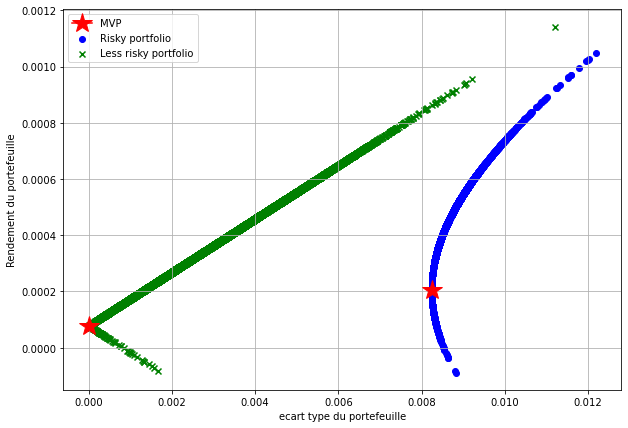

In [13]:
returns_risky_pf, stds_risky_pf, alloc_risky_pf = analyse_moyenne_variance_risked_pf(returns, var_returns, n, 5000)
returns_less_risky_pf, stds_less_risky_pf, alloc_less_risky_pf = analyse_moyenne_variance_less_risky_pf(returns, var_returns, 0.02, n, 5000)

plt.figure(figsize=(10, 7))
# MVPs
### risky
mvp_std = np.min(stds_risky_pf)
index_mvp_std = stds_risky_pf.index(mvp_std)
mvp_return  = returns_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

###Less risky
mvp_std = np.min(stds_less_risky_pf)
index_mvp_std = stds_less_risky_pf.index(mvp_std)
mvp_return  = returns_less_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, marker="*", color="red", markersize=20)

# Courbes
plt.scatter(stds_risky_pf, returns_risky_pf, marker="o", color="blue", label="Risky portfolio")
plt.scatter( stds_less_risky_pf, returns_less_risky_pf, marker="x", color="green", label="Less risky portfolio")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

Dans ce cas pr√©sent, nous avons un taux sans risque inf√©rieur √† A/C qui correspond au rendement esp√©r√© du portefeuille de variance minimale exclusivement expos√© √† des actifs risqu√©s. 

Nous pouvons conjecturer graphiquement que si le taux sans risque est inf√©rieur √† A/C alors la demi-droite efficiente  de l'ensemble des portefeuille contenant un actif non risqu√© est tangent √† la fronti√®re efficiente du second.

<u> D√©monstration </u>

Nous devons trouver le point d'intersection entre les droites efficientes (portions de courbes croissantes) de la courbe verte et de la courbe bleue.

Notons ce portefeuille $_{inter}$.
Tout d'abord notons que ce portefeuille doit v√©rifier $w_0 = 0$ tel que: $ e^T w = 1$

En substituant √† l'√©quation: $ w = \Sigma^{-1} (\mu - e R_f) \cdot \frac{\bar{r_p} - R_f}{B - 2AR_f + C R_f^2}$

Nous obtenons:

$ \bar{r_p} - R_f = \frac{B - 2AR_f + C R_f^2}{A - C R_f}$

Donc, 

$$
w_{inter} = \frac{\Sigma^{-1}(\mu - e R_f)}{A - C R_f} \\
E(R_{inter}) = \frac{B - A R_f}{A - C R_f} \\
\sigma^2(R_{inter}) = \frac{B - 2AR_f + C R_f^2}{(A - C R_f)^2}
$$

Ainsi, nous avons montr√© dans cette partie que si $ R_f < A/C $ Alors, leur portefeuille commun se siue sur la fronti√®re efficiente.

Notez de m√™me que les portefeuilles efficients sur la portion de la demi-droite avant tangence correspondent aux portefeuilles o√π $w_0 >= 0$, au dela nous nous retrouvons avec des portefeuilles √† allocation n√©gative sur l'actif sans risque, ce qui n'est pas r√©aliste.

Nouvelle version du th√©or√®me de s√©paration √† deux fonds:

Dans un march√© contenant un actif sans risque, tout portefeuille peut √™tre per√ßu comme une combinaison lin√©aire de deux portefeuille un portefeuille compos√© de l'actif sans risque et un portefeuille compos√© des actifs risqu√©s.

Dans ce mod√®le, tous les investisseurs se situerait sur cette demi droite en fonction de leur richesse, de leur niveau d'aversion au risque. Un investisseur ayant moins d'aversion au risque placera un portion de richesse non nulle sur le portefeuille $w_inter$. Il pourrait meme faire jouer un effet de levier en allouant plus d 100% aux actifs risqu√©s et en vendant √† d√©couvert l'actif sans risque.

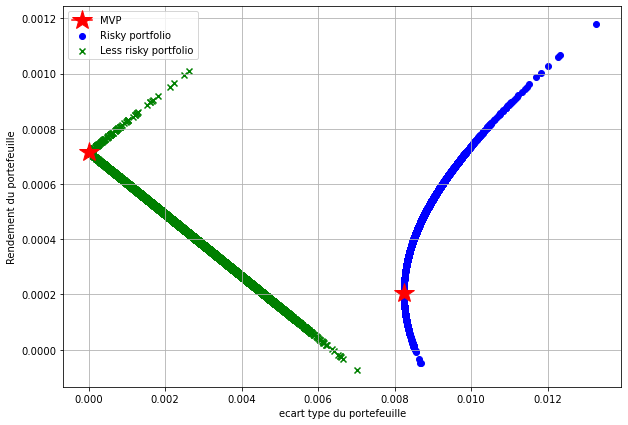

In [14]:
#### Cas Rf > A/C

returns_risky_pf, stds_risky_pf, alloc_risky_pf = analyse_moyenne_variance_risked_pf(returns, var_returns, n, 5000)
returns_less_risky_pf, stds_less_risky_pf, alloc_less_risky_pf = analyse_moyenne_variance_less_risky_pf(returns, var_returns, 0.2, n, 5000)

plt.figure(figsize=(10, 7))
# MVPs
### risky
mvp_std = np.min(stds_risky_pf)
index_mvp_std = stds_risky_pf.index(mvp_std)
mvp_return  = returns_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, label = "MVP", marker="*", color="red", markersize=20)

###Less risky
mvp_std = np.min(stds_less_risky_pf)
index_mvp_std = stds_less_risky_pf.index(mvp_std)
mvp_return  = returns_less_risky_pf[index_mvp_std]
plt.plot(mvp_std, mvp_return, marker="*", color="red", markersize=20)

# Courbes
plt.scatter(stds_risky_pf, returns_risky_pf, marker="o", color="blue", label="Risky portfolio")
plt.scatter( stds_less_risky_pf, returns_less_risky_pf, marker="x", color="green", label="Less risky portfolio")
plt.xlabel("ecart type du portefeuille")
plt.ylabel("Rendement du portefeuille")
plt.grid()
plt.legend()
plt.show()

Dans ce cas de figure, le taux sans risque est sup√©rieur au rendement du portefeuille de variance minimale 
et on peut conjecturer mani√®re analogue √† la pr√©c√©dente √©tude, que la demi-droite des portefeuilles domin√©s est tangente √† la portion de courbe des protefeuilles risqu√©s domin√©s.

Ce cas de figure permet d'avoir des portfeuilles avec un vrai placement sans risque plus optimis√©s qu'un portfeuille risqu√© sur les deux demi droites et doit d√©courager l'investisseur √† placer dans des portefeuilles dont l'√©cart type est inclus dans l'intervalle $[0, 1/\sqrt C]$

### Sensibilit√©s du portefeuille

Comme nous avons pu le voir dans les sections pr√©c√©dentes, l'analyse moyenne-variance repose fortement sur le calcul des vecteurs de rendements et de la matrice de variance-covariance. 
Cette approche implique quelques limites:

- la consid√©ration de ce vecteur et de cette matrice comme stationnaires, ce qui peu sur le long-moyen terme dans des march√©s liquides √™tre une approximation valable mais PAS TOUOURS.

- Les portefeuilles institutionnelles exposant l'√©pargne public sont soumis √† des contraintes de diversification en terme de nombres d'actifs ce qui rend les calculs assez fastidieux.

- Il y a aussi les probl√®mes inh√©rent √† l'inversion de la matrice de variance-covariance qui complique la r√©solution

Cependant, il existe des m√©thodes bas√©es sur des hypoth√®ses simplificatrices qui permettent de r√©duire l'impact de ces limites:

- Mod√®les d'indices pour mod√©liser les fluctuations des rendements des titres financiers
- Supposer que les corr√©lations des titres de m√™me cat√©gories restes constantes

<u> Quelques m√©thodes </u>


- Mod√®le indiciel

-- Mod√®le de march√©s √† indice unique ou multi-indice -- 

Mod√®le de march√© √† indice unique

Dans cette situation, il sera th√©oriquement suffisant de calculer la covariance entre le rendement du chaque titre et celui de l'indice, ce qui reduit la complexit√© de calcul passant d'une complexit√© quadratique √† une complexit√© lin√©aire.

Mod√®le de march√© multi indice

Dans cette situation, il sera th√©oriquement suffisant de regrouper les actifs par indice et d'appliquer la covariance indicielle juste.

-- M√©thode d'Elton, Gruber et Padberg --

Cette m√©thode consiste √† class√© les actifs par ratio de Treynor, selectionn√© l'ensemble des titres sup√©rieurs √† un ratio seuil.

- Mod√®les de correction moyenne

Mod√®le de la moyenne g√©n√©rale qui pr√©suppose que tous les titres appratiennent √† la m√™me cat√©gorie et que leur coefficient de corr√©lation est √©gal √† la moyenne des coefficients de corr√©lations observ√©s entre les actifs.

Mod√®le de la moyenne g√©n√©rale par secteur qui pr√©suppose que tous les titres appartiennent au moins √† une cat√©gorie et que leur coefficient de corr√©lation est constant vis √† vis de cette cat√©gorie et est √©gal √† la moyenne des coefficients de corr√©lations observ√©s dans la cat√©gorie.

Conclusions empiriques sur les diff√©rentes approches

L'estimation directe de la matrice de variances-covariances sur des donn√©es historiques ne fournit pas une bonne pr√©diction des corr√©lations futurs. Les mod√®les √† indices ou √† moyenne permettent une meilleure pr√©cision en r√©duisant l'impact des fluctuation, cependant le risque d'estimation n'est qu'en partie supprim√©.

Travaux et assentiment g√©n√©ral:

Best et Grauer (1991) ont d√©montr√© empiriquement que la prise en compte d'un certain nombre de contraintes portant notamment sur les ventes √† d√©couvert permettent de r√©duire en partie les cons√©quences des erreurs d'estimation.

Frost et Savarion (1988) ont d√©montr√© empiriquement que le risque d'estimation √©tait bien plus fort sur les rendements plut√¥t que sur les variances-covariances. Ils ont ainsi d√©montr√© que dans un cas de fort risque d'estimation il sera judicieux de r√©duire ce risque en √©quipond√©rant le portefeuille.

### Applications Analyse Moyenne-Variance avec hypoth√®ses simplificatrices et methodes de corrections

Ainsi, mettons nous au niveau des gestionnaires institutionnelles qui doivent r√©pondre √† certaines exigences de profondeur de portefeuilles qui peuvent contenir jusqu'√† plusieurs centaines de titres.

L'id√©e dans cette section est alors d'appliquer les m√©thodes de simplification et d'optimisation de calculs √©nonc√©es dans la pr√©c√©dente partie.

Un portefeuille aussi profond necessite une automatisation du processus de calcul et une base de donn√©e tickers.
Pour ce faire, j'ai trouv√© sur internet un CSV assez complet mais dont la derni√®re mise √† jour date de 2017. On aura alors potentiellenement des tickers obsol√©tes mais heureusement la biblioth√®que yfinance g√®re cette exception et pourra malgr√© cela continuer √† boucler.  

In [24]:
start = "2022-08-01"
end = "2023-08-01"
tickers_data = pd.read_excel("Ressources/tickers.xlsx", sheet_name="Stock")
tickers_data_usa = tickers_data[tickers_data["Country"] == "USA"].dropna()
tickers_data_usa

Ticker                         Name Exchange  \
1        AAPL                   Apple Inc.      NMS   
2         BAC  Bank of America Corporation      NYQ   
3        AMZN             Amazon.com, Inc.      NMS   
4           T                    AT&T Inc.      NYQ   
5        GOOG                Alphabet Inc.      NMS   
...       ...                          ...      ...   
104966   INTZ               Intrusion Inc.      PNK   
104992   INVU             Investview, Inc.      PNK   
105102    LTM    LATAM Airlines Group S.A.      NYQ   
105690   PRHL  Premier Holding Corporation      PNK   
106278   GROG             GroGenesis, Inc.      PNK   

                         Category Name Country  
1                 Electronic Equipment     USA  
2                   Money Center Banks     USA  
3          Catalog & Mail Order Houses     USA  
4          Telecom Services - Domestic     USA  
5       Internet Information Providers     USA  
...                                ...     ...  
104966    Security Software & Services     USA  
104992               Business Services     USA  
105102             Sporting Activities     USA  
105690           Diversified Utilities     USA  
106278          Agricultural Chemicals     USA  

[5359 rows x 5 columns]

#### Mod√®le de march√© √† indice unique

Appliquons ce mod√®le en selectionnant des big et mega caps americaines (selection al√©atoire pour le moment, les crit√®res de screening seront vu plus tard) et en utilisant tout naturellement comme indice de march√© le S&P 500 (indice le plus repr√©sentatif du march√© action am√©ricain).

### Contraintes suppl√©mentaires

Pour l'instant nous n'avons r√©solu que des probl√®mes d'optimisations avec une seule contrainte, la contrainte de budget qui permet une utilisation globale de la richesse disponible: $ w^T e = 1 $

Or, il est tout √† fait possible d'ajouter des contraintes suppl√©mentaires √† notre probl√®me, tel que des co√ªts de transaction, des plafonds et des seuils d'allocations, ... . Formellement, il s'agit de r√©soudre des programmes d'optimisation du type: 

$$ 
Min_w(w^T \Sigma w) \\
w^T e = 1 \\
w ‚Ç¨ K \\
$$

Ceci fait pr√©cis√©ment l'objet de ce que l'on appelle la programmation convexe qui consiste √† maximiser ou minimiser une fonction prenant ces valeurs dans un ensemble convexe. Cette exercice peut √™tre particuli√®rement difficile sauf dans le cas particulier o√π K est un c√¥ne.

Algorithmes de r√©solutions connus: Frank et Wolfe (1956) , Perold (1984), Nesterov et Nemirovski (1995)

<u> Exemple d'ensemble K et de contraintes </u> 

L'ensemble K peut correspondre √† un intervalle dans lequel les poids doivent prendre leur valeur, un ensemble du type: $ A \leq w \leq B $

Les gestionnaires institutionnelles doivent necessairement utilis√©s ce type de contrainte pour r√©pondre √† des exigences r√©glementaire pour des soucis de diversification en terme de nombre d'actifs sous gestions et de poids allou√©s √† chacun d'entre eux ce qui vise √† r√©duire leur impact individuel.

Dans le cadre d'une strat√©gie du type constant mix, il peut y avoir aussi des contraintes de rebalancement en limitant la somme des achats de titres:
$$
V_0 \cdot \Sigma_i Max(w_i - w_0, 0) \leq s
$$